Loading and preprocessing data...
Training Random Forest Model...
Random Forest Model Evaluation:
Accuracy: 0.905
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90        93
           1       0.96      0.86      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200

ROC AUC Score: 0.9350316551100392


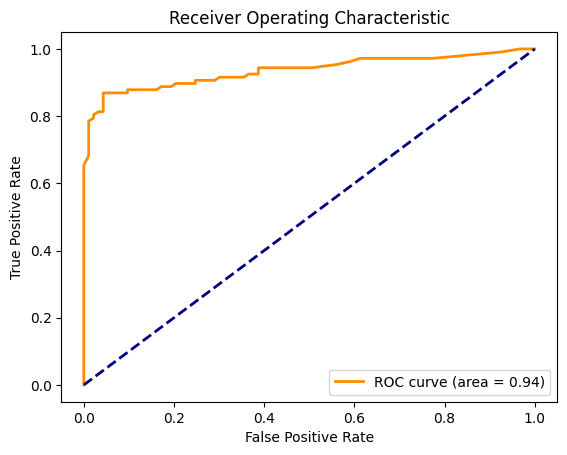

Model saved successfully as 'rf_model.pkl'!


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_classification

# Step 1: Load and preprocess multimodal EEG and MRI data
def load_and_preprocess_data():
    # Generate synthetic data for EEG and MRI datasets
    eeg_data, eeg_labels = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
    mri_data, mri_labels = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

    # Combine EEG and MRI datasets into a single DataFrame
    eeg_df = pd.DataFrame(eeg_data, columns=[f"eeg_feature_{i}" for i in range(20)])
    mri_df = pd.DataFrame(mri_data, columns=[f"mri_feature_{i}" for i in range(20)])

    # Add patient IDs and target variable (simulating real-world scenario)
    eeg_df['patient_id'] = range(1000)
    eeg_df['seizure_onset'] = eeg_labels
    mri_df['patient_id'] = range(1000)

    # Merge datasets on patient_id
    combined_data = pd.merge(eeg_df, mri_df, on="patient_id")

    # Separate features and target
    X = combined_data.drop(columns=["seizure_onset", "patient_id"])
    y = combined_data["seizure_onset"]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

# Step 2: Train-test split
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model (as baseline)
def train_random_forest(X_train, y_train):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

# Step 4: Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Calculate ROC and AUC
    roc_auc = roc_auc_score(y_test, y_prob)
    print("ROC AUC Score:", roc_auc)

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Step 5: Save the trained models
def save_model(model, model_path):
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)

# Example usage
if __name__ == "__main__":
    print("Loading and preprocessing data...")
    X, y = load_and_preprocess_data()
    X_train, X_test, y_train, y_test = split_data(X, y)

    print("Training Random Forest Model...")
    rf_model = train_random_forest(X_train, y_train)

    print("Random Forest Model Evaluation:")
    evaluate_model(rf_model, X_test, y_test)

    save_model(rf_model, "rf_model.pkl")
    print("Model saved successfully as 'rf_model.pkl'!")
